In [1]:
import os
from glob import glob
from skimage.io import imread
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, perimeter
from scipy import ndimage as ndi
from scipy.cluster.vq import kmeans
import numpy as np

In [2]:
p_args = dict(cmap = 'bone', interpolation = 'none')

In [3]:
base_path = os.path.join('Dataset','kaggle', '3d_images')
all_images = glob(os.path.join(base_path,'IMG_*'))
print(len(all_images))

4


In [4]:
img=nib.load(all_images[0])
test_image=img.get_data()
print('loading images:', test_image.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


loading images: (325, 512, 512)


In [5]:
ref_slice_idx = 100

In [6]:
from skimage.morphology import reconstruction
def fill_image(in_image):
    seed = np.copy(in_image)
    seed[1:-1, 1:-1] = in_image.max()
    mask = in_image
    return reconstruction(seed, mask, method='erosion')
def fill_image_3d(in_image):
    return np.stack([fill_image(c_slice) for c_slice in in_image],0)

In [7]:
print(test_image.shape)

(325, 512, 512)


In [8]:
fl_image = fill_image_3d(test_image)

In [9]:
print(fl_image.shape)

(325, 512, 512)


In [10]:
dfl_image = np.abs(fl_image - test_image)
print(dfl_image.shape)

(325, 512, 512)


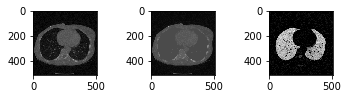

In [11]:
plt.subplot(331)
plt.imshow(test_image[ref_slice_idx], cmap='gray')
plt.subplot(332)
plt.imshow(fl_image[ref_slice_idx], cmap='gray')
plt.subplot(333)
plt.imshow(dfl_image[ref_slice_idx], cmap='gray')
plt.show()

In [56]:
def kmeans_thresh(in_img):
    centers, _ = kmeans(in_img.ravel().astype(np.float32), 2)
    tissue_center, air_center = sorted(centers)
    return np.abs(in_img-air_center)<np.abs(in_img-tissue_center)

In [57]:
k_seg = kmeans_thresh(dfl_image)

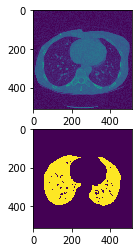

In [58]:
plt.subplot(211)
plt.imshow(test_image[ref_slice_idx])
plt.subplot(212)
plt.imshow(k_seg[ref_slice_idx])
plt.show()

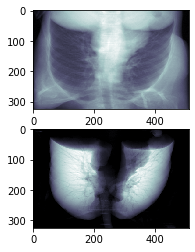

In [63]:
plt.subplot(211)
plt.imshow(np.sum(test_image,1), cmap= 'bone')
plt.subplot(212)
plt.imshow(np.sum(k_seg,1), cmap = 'bone')
plt.show()

(512, 512)


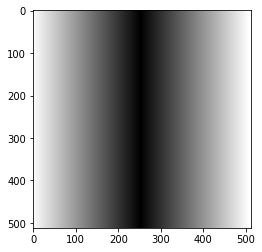

In [86]:
mask=np.array(k_seg[100,:,:])
from PIL import Image
# mask.shape
# 325, 512, 512
dist=np.copy(mask)*0
print(dist.shape)
for i in range(0,512):
    for j in range(0,512):
        dist[i,j]=np.abs(j-252);
plt.imshow(Image.fromarray(dist))


In [ ]:
#Section3.2
from scipy.spatial import distance
print(k_seg[100,:,:].shape)
dist=np.copy(k_seg)*0
for i in range(0,512):
    for j in range(0,252):
        dst[100,i,j] = 